In [1]:
import saspy
import pandas as pd
sas_sess = saspy.SASsession(cfgname="oda")
air_sd = sas_sess.sasdata('airline', 'sashelp')
air_df = air_sd.to_df()

SAS Connection established. Subprocess id is 841321



In [15]:
# Key to this exercise is to understand that air_sd points to the SAS server
# and air_df is a DataFrame object that holds all of the data on your PC
type(air_sd)

saspy.sasdata.SASdata

In [14]:
type(air_df)

pandas.core.frame.DataFrame

In [16]:
air_sd.head()

,DATE,AIR,Region
0,1949-01-01,112,ALL
1,1949-02-01,118,ALL
2,1949-03-01,132,ALL
3,1949-04-01,129,ALL
4,1949-05-01,121,ALL



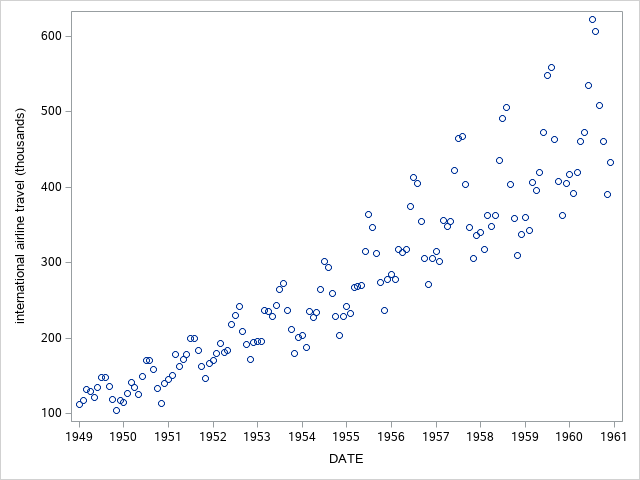

In [17]:
# This executes on the SAS server.  SAS column names are not case sensitive.
air_sd.scatter('Date', 'AIR')

In [20]:
# Python column names are case-sensitive so you have to match case. 
# SAS doesn't care about case on column names.
air_df.columns

Index(['DATE', 'AIR', 'Region'], dtype='object')

<AxesSubplot:xlabel='DATE', ylabel='AIR'>

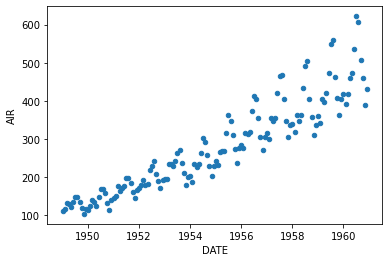

In [18]:
# This executes in your PC's python environment.  Python column names are case sensive.
air_df.plot.scatter('DATE', 'AIR')

In [10]:
air_df['DATE'].max() - air_df['DATE'].min()

Timedelta('4352 days 00:00:00')

In [55]:
capitals = {'OH': 'Columbus', 'NC': 'Raleigh', 'TN': 'Nashville', 'AK': 'Juneau'}
for state in capitals:
    print(f'The capital of {state} is {capitals[state]}')

The capital of OH is Columbus
The capital of NC is Raleigh
The capital of TN is Nashville
The capital of AK is Juneau


In [22]:
early_air_df = air_sd.where('DATE < "01Jan1950"d').to_df()

In [23]:
early_air_df.describe()

,AIR
count,12.000000
mean,126.666667
std,13.720147
min,104.000000
25%,118.000000
50%,125.000000
75%,135.250000
max,148.000000


In [24]:
# Create a SASData object that points to the SAS data set SASHELP.HEART
heart_sd = sas_sess.sasdata('heart', 'sashelp')

In [25]:
type(heart_sd)

saspy.sasdata.SASdata

In [28]:
# Create two new SASData objects with a where statement that will filter the rows
heart_male = heart_sd.where('Sex = "Male" and Systolic > 140')
heart_female = heart_sd.where('Sex = "Female" and Systolic > 140')

In [29]:
# Convert the SASData objects to DataFrames which will contain all of the data on your PC in python
heart_male_df = heart_male.to_df()
heart_female_df = heart_female.to_df()

In [33]:
# The DataFram describe() method gives us basic statistics
heart_male_df.describe()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
count,333.000000,756.000000,756.000000,755.000000,756.000000,756.00000,755.000000,748.000000,501.000000,737.000000
mean,61.306306,46.697090,67.250331,173.446358,96.846561,159.73545,124.266225,13.794118,69.341317,231.743555
std,9.669035,8.626744,2.739172,26.379815,12.678406,18.23326,16.991396,14.164850,9.938273,44.949799
min,33.000000,29.000000,56.500000,107.000000,52.000000,142.00000,84.000000,0.000000,36.000000,124.000000
25%,55.000000,40.000000,65.500000,155.000000,90.000000,147.75000,113.000000,0.000000,63.000000,202.000000
50%,60.000000,47.000000,67.250000,174.000000,96.000000,155.00000,123.000000,15.000000,70.000000,228.000000
75%,67.000000,54.000000,69.250000,190.000000,104.000000,166.00000,135.000000,20.000000,76.000000,258.000000
max,88.000000,62.000000,76.500000,273.000000,160.000000,276.00000,203.000000,60.000000,91.000000,568.000000


In [34]:
heart_female_df.describe()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
count,318.000000,941.000000,939.000000,941.000000,941.000000,941.000000,941.000000,934.000000,468.000000,913.000000
mean,66.575472,49.342189,62.242279,152.452710,96.929862,165.857598,131.617428,3.695931,73.579060,244.355969
std,9.508371,7.351640,2.419907,29.368516,12.927678,23.550871,25.295115,7.596725,9.842885,48.726674
min,41.000000,30.000000,53.750000,92.000000,60.000000,142.000000,76.000000,0.000000,36.000000,125.000000
25%,60.000000,44.000000,60.500000,133.000000,90.000000,150.000000,113.000000,0.000000,68.000000,210.000000
50%,66.000000,50.000000,62.250000,148.000000,95.000000,160.000000,128.000000,0.000000,75.000000,240.000000
75%,73.000000,55.000000,64.000000,169.000000,104.000000,175.000000,145.000000,5.000000,80.000000,275.000000
max,90.000000,62.000000,69.000000,300.000000,155.000000,300.000000,268.000000,45.000000,93.000000,493.000000


In [38]:
# You can also use the mean() method to get the mean of a signle column
heart_male_df['Systolic'].mean()

159.73544973544975

In [37]:
heart_female_df['Systolic'].mean()

165.8575982996812

In [102]:
# The DataFrame corr() method products a correlation matrix for all numeric variables. 
heart_male_df.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.564883,-0.095737,-0.189655,-0.131728,0.055803,-0.164620,-0.258405,0.731749,-0.259512
AgeAtStart,0.564883,1.000000,-0.266464,-0.192110,0.040845,0.223604,-0.063401,-0.198198,0.608073,0.001267
Height,-0.095737,-0.266464,1.000000,0.460858,0.016020,-0.097962,-0.054156,0.063449,-0.127008,-0.012955
Weight,-0.189655,-0.192110,0.460858,1.000000,0.232161,0.057285,0.855645,-0.021962,-0.078991,0.050410
Diastolic,-0.131728,0.040845,0.016020,0.232161,1.000000,0.583653,0.252905,-0.085990,-0.092269,0.053268
Systolic,0.055803,0.223604,-0.097962,0.057285,0.583653,1.000000,0.123630,-0.116346,-0.044596,0.043810
MRW,-0.164620,-0.063401,-0.054156,0.855645,0.252905,0.123630,1.000000,-0.059892,-0.012300,0.062885
Smoking,-0.258405,-0.198198,0.063449,-0.021962,-0.085990,-0.116346,-0.059892,1.000000,-0.309948,0.096643
AgeAtDeath,0.731749,0.608073,-0.127008,-0.078991,-0.092269,-0.044596,-0.012300,-0.309948,1.000000,-0.114055
Cholesterol,-0.259512,0.001267,-0.012955,0.050410,0.053268,0.043810,0.062885,0.096643,-0.114055,1.000000


In [101]:
heart_female_df.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.488560,-0.007193,-0.105794,-0.099557,-0.030776,-0.109036,-0.069024,0.660181,0.073851
AgeAtStart,0.488560,1.000000,-0.069592,0.047958,0.098207,0.268006,0.070704,-0.209053,0.665497,0.313059
Height,-0.007193,-0.069592,1.000000,0.212472,-0.042248,-0.093900,-0.179101,0.052829,-0.030876,-0.027544
Weight,-0.105794,0.047958,0.212472,1.000000,0.214353,0.179078,0.919585,-0.078193,-0.018564,-0.043429
Diastolic,-0.099557,0.098207,-0.042248,0.214353,1.000000,0.702971,0.232644,0.013952,-0.027042,0.047077
Systolic,-0.030776,0.268006,-0.093900,0.179078,0.702971,1.000000,0.220904,-0.053841,0.093974,0.089238
MRW,-0.109036,0.070704,-0.179101,0.919585,0.232644,0.220904,1.000000,-0.096122,-0.009023,-0.036257
Smoking,-0.069024,-0.209053,0.052829,-0.078193,0.013952,-0.053841,-0.096122,1.000000,-0.231143,-0.040444
AgeAtDeath,0.660181,0.665497,-0.030876,-0.018564,-0.027042,0.093974,-0.009023,-0.231143,1.000000,0.115705
Cholesterol,0.073851,0.313059,-0.027544,-0.043429,0.047077,0.089238,-0.036257,-0.040444,0.115705,1.000000
